# Plots

In [1]:
# Data Handling and Analysis
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import date, timedelta
from scipy import stats 

# Plotting and Visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Configurations
import warnings
warnings.filterwarnings("ignore")

# Configuração dos gráficos
from matplotlib import rc

# Estilo dos gráficos
# Referência: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('Solarize_Light2')
%config InlineBackend.figure_format = 'retina'  # Formato das imagens

# Configurações de fontes
rc('font', **{"family":"sans-serif","sans-serif":["DejaVu Sans"], "size":9})
rc('mathtext', **{"default":"regular"})

%matplotlib inline

In [8]:
# Define the date range
start_date = date.today() - timedelta(days=1825)
end_date = date.today()

# List of stocks and corresponding company names
stocks = ['POMO4.SA', 'WEGE3.SA', 'PETR4.SA', 'BTLG11.SA', 'B3SA3.SA']
company_names = ["Marcopolo", "Weg", "Petrobras", "BTG logística", "Bovespa"]
coluns = company_names.copy()

# Initialize a dictionary to store different types of price data
price_data_dict = {key: [] for key in ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']}

def merge_dataframes(data_list):
    """Merge a list of DataFrames on the 'Date' column."""
    if not data_list:
        return None
    
    merged_df = data_list[0]
    if isinstance(merged_df.columns, pd.MultiIndex):
        merged_df.columns = merged_df.columns.get_level_values(0)

    for df in data_list[1:]:
        if isinstance(df.columns, pd.MultiIndex):
            df.columns = df.columns.get_level_values(0)
        merged_df = pd.merge(merged_df, df, on='Date', how='outer')
    
    return merged_df

def download_and_prepare_stock_data(stock_symbol, company_name):
    """Download stock data and prepare it for processing."""
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date).reset_index()
    
    for price_type in price_data_dict:
        if price_type in stock_data.columns:
            price_df = stock_data[['Date', price_type]].rename(columns={price_type: company_name})
            price_data_dict[price_type].append(price_df)

# Download and prepare data for each stock
for stock_symbol, company_name in zip(stocks, company_names):
    download_and_prepare_stock_data(stock_symbol, company_name)

# Combine all price type dataframes
df_adj_close = merge_dataframes(price_data_dict['Adj Close'])
df_close = merge_dataframes(price_data_dict['Close'])
df_high = merge_dataframes(price_data_dict['High'])
df_low = merge_dataframes(price_data_dict['Low'])
df_open = merge_dataframes(price_data_dict['Open'])
df_volume = merge_dataframes(price_data_dict['Volume'])
df_adj_close = df_adj_close.set_index('Date')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
df_adj_close.describe().round(3)

Price,Marcopolo,Weg,Petrobras,BTG logística,Bovespa
count,1243.000,1243.000,1243.000,1243.000,1243.000
mean,3.687,33.652,18.183,86.016,12.737
std,1.939,8.504,10.464,7.149,2.038
min,1.767,12.388,3.906,58.948,8.343
25%,2.277,29.770,9.756,80.988,11.043
50%,2.523,34.278,14.809,84.325,12.360
75%,5.139,37.870,27.088,91.044,14.016
max,9.590,57.190,39.600,104.315,18.666


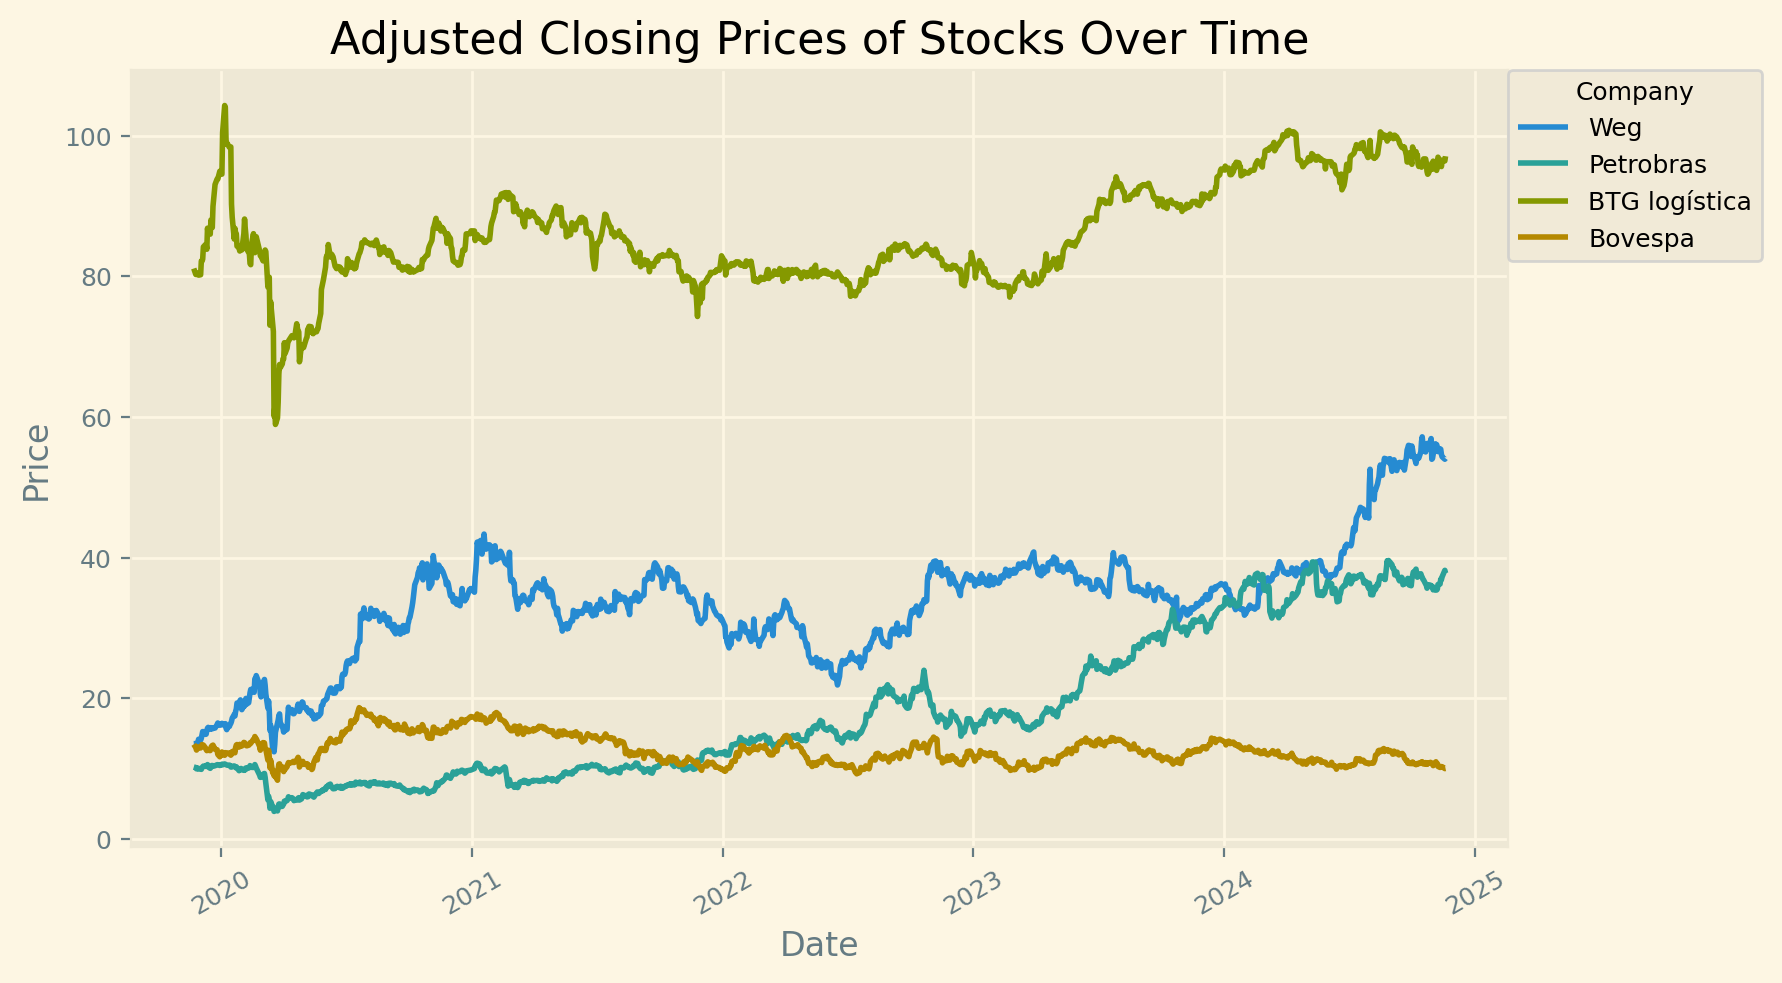

In [10]:
def plot_closing_prices(df_adj_close, title='Adjusted Closing Prices of Stocks Over Time', figsize=(9, 5)):
    """
    Function to plot adjusted closing prices of stocks over time for a given DataFrame.
    
    Parameters:
    - df_adj_close (pd.DataFrame): The DataFrame containing 'Date' as the first column and other columns as prices of different companies.
    - title (str): The title of the plot.
    - figsize (tuple): The size of the figure (width, height).
    """
    # Set the figure size
    plt.figure(figsize=figsize)
    # Plot each company's adjusted closing prices
    for column in df_adj_close.columns[1:]:
        plt.plot(df_adj_close.index, df_adj_close[column], label=column)

    # Customize the plot
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')

    # Show legend
    plt.legend(title='Company', loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.)

    # Add grid, rotate x-axis labels, and adjust layout
    plt.grid(True)
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_closing_prices(df_adj_close)

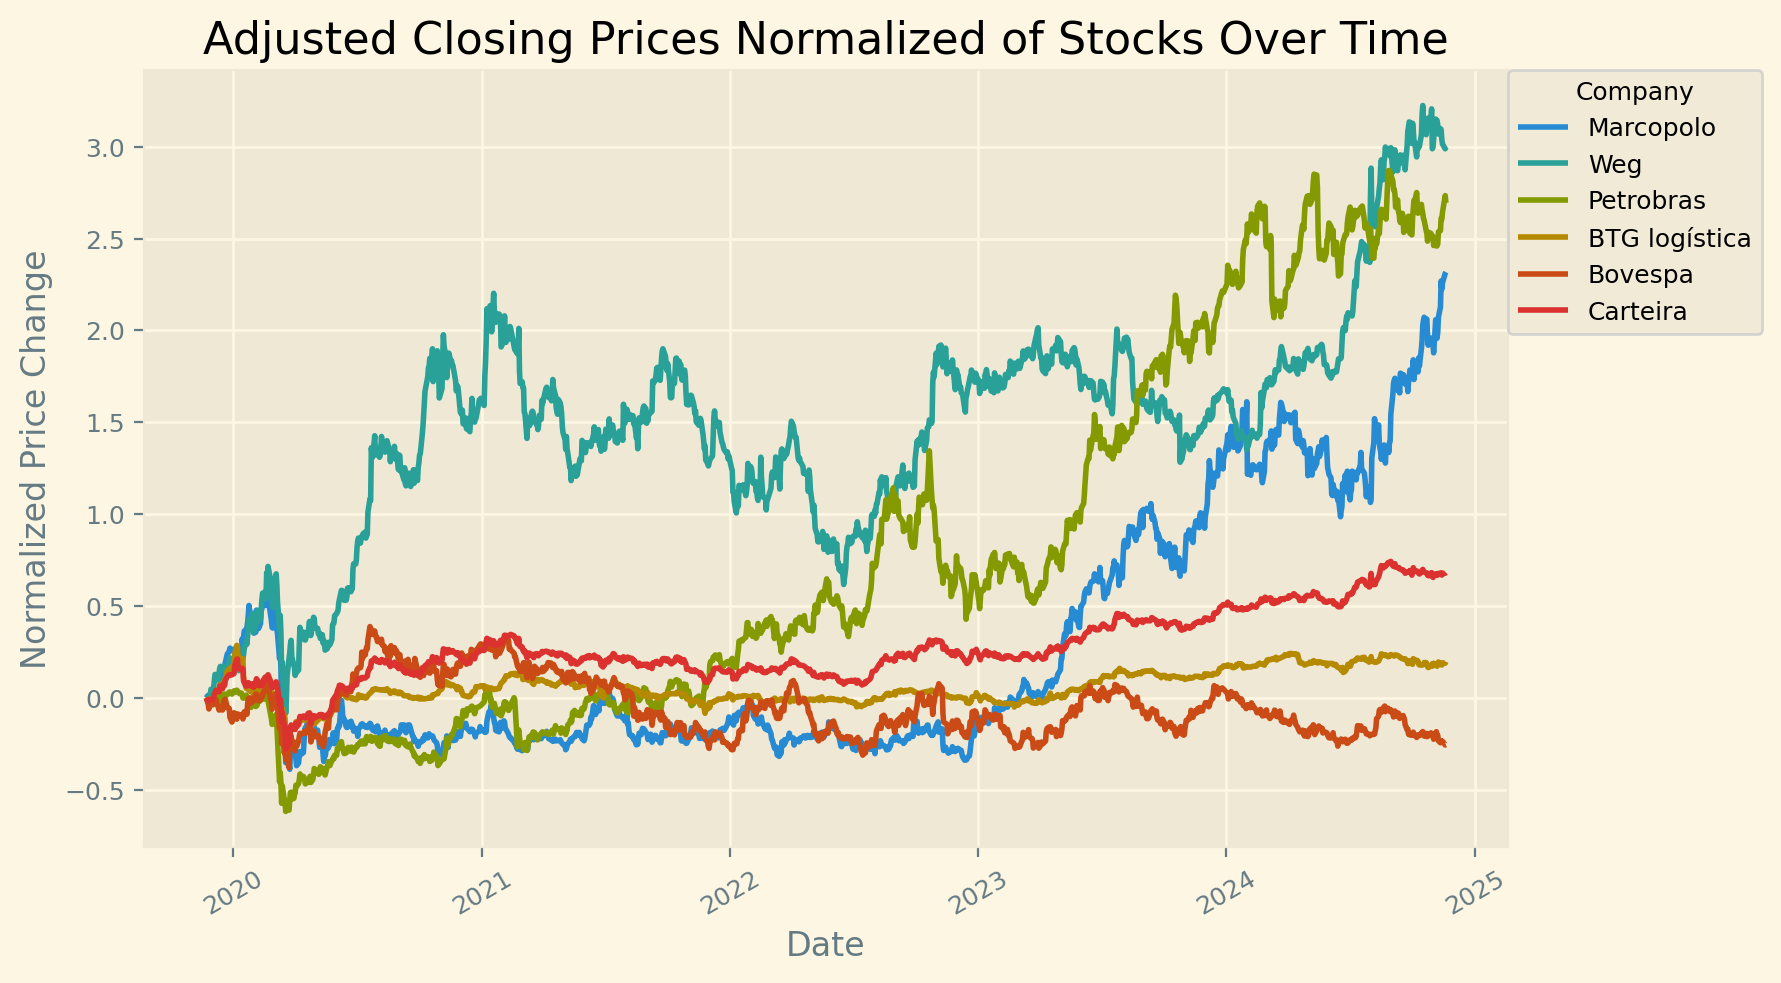

In [11]:
def plot_adjusted_closing_prices_normalized(df_adj_close, title='Adjusted Closing Prices Normalized of Stocks Over Time', figsize=(9, 5)):
    """
    Function to plot normalized adjusted closing prices of stocks over time for a given DataFrame.
    
    Parameters:
    - df_adj_close (pd.DataFrame): The DataFrame containing 'Date' as the first column and other columns as prices of different companies.
    - title (str): The title of the plot.
    - figsize (tuple): The size of the figure (width, height).
    """

    # Normalize the data by company
    df_adj_close_normalized = df_adj_close.copy()
    df_adj_close_normalized['Carteira'] = df_adj_close_normalized.iloc[:, 1:].sum(axis=1)
    for column in df_adj_close_normalized.columns:
        df_adj_close_normalized[column] = (df_adj_close_normalized[column] / df_adj_close_normalized[column].iloc[0]) - 1

    # Set the figure size
    plt.figure(figsize=figsize)

    # Plot each company's normalized adjusted closing prices
    for column in df_adj_close_normalized.columns:
        plt.plot(df_adj_close_normalized.index, df_adj_close_normalized[column], label=column)

    # Customize the plot
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Normalized Price Change')

    # Show legend
    plt.legend(title='Company', loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.)

    # Add grid, rotate x-axis labels, and adjust layout
    plt.grid(True)
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Plot the normalized data
plot_adjusted_closing_prices_normalized(df_adj_close)


## Médias Móveis


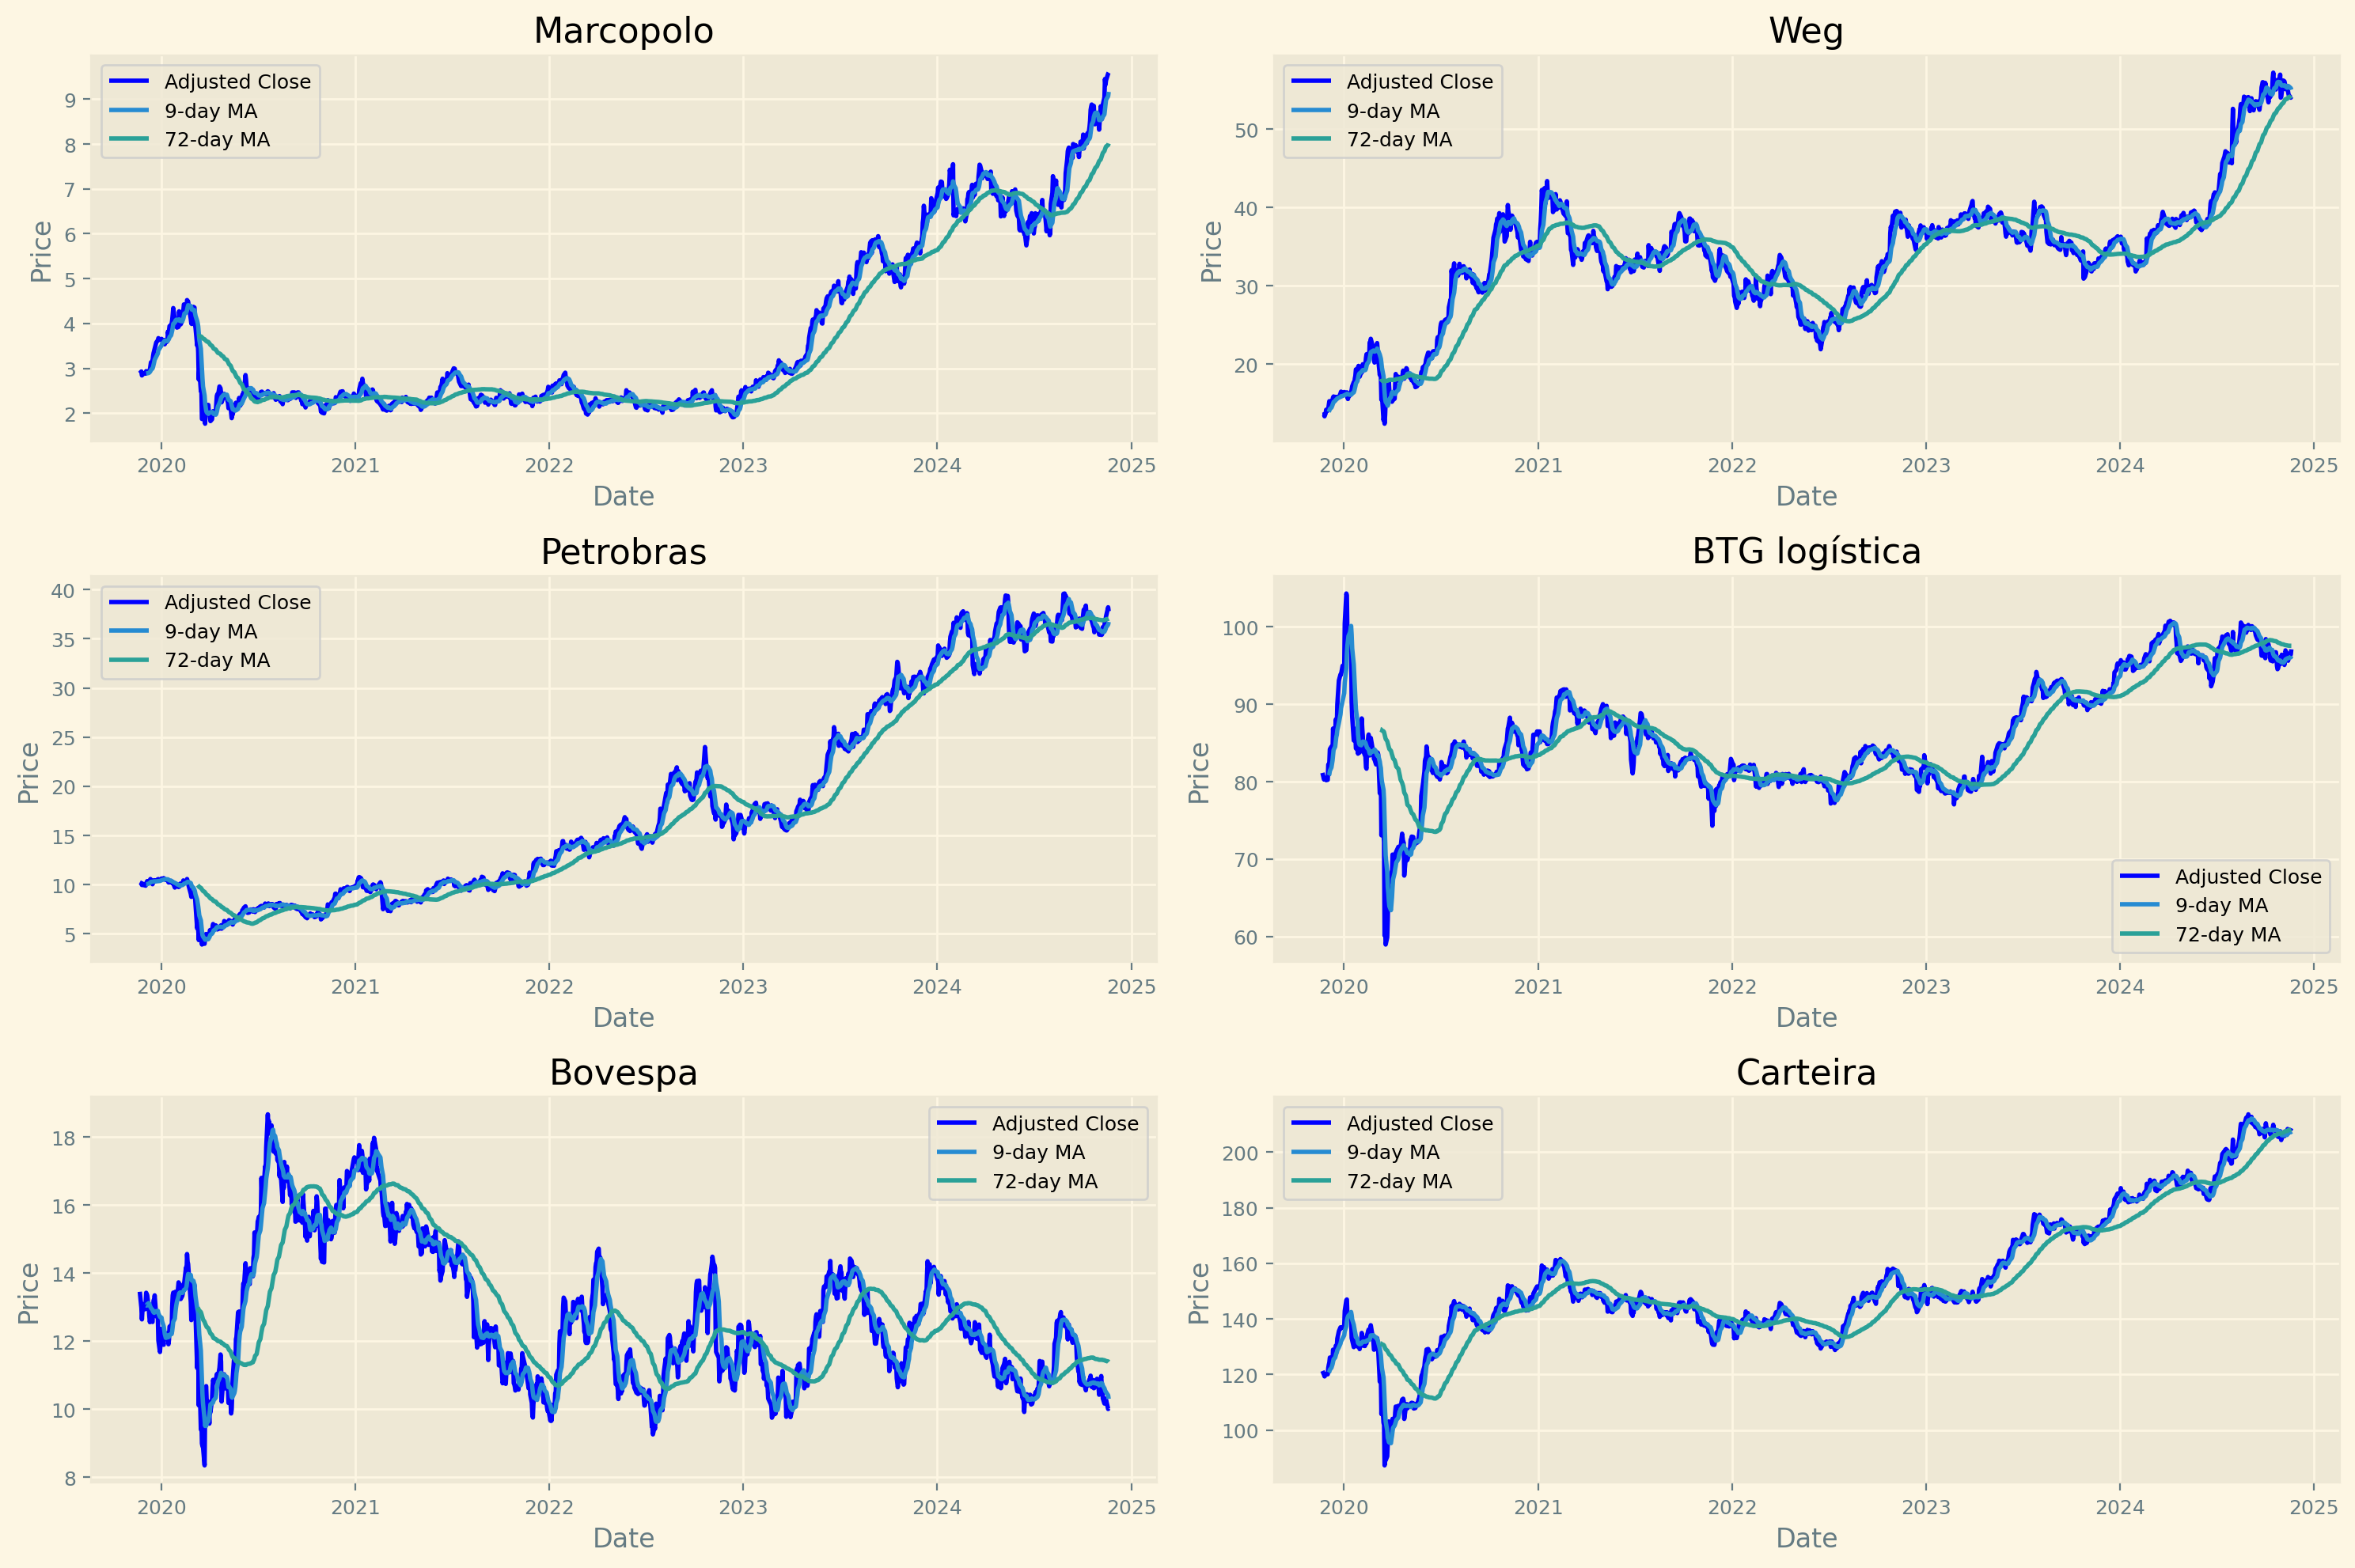

In [12]:
def calculate_and_plot_moving_averages(df_adj_close, company_names, ma_days=[9, 72], figsize=(15, 10)):
    """
    Function to calculate moving averages and plot them along with Adjusted Close prices.

    Parameters:
    - df_adj_close (pd.DataFrame): DataFrame containing 'Date' as the first column and other columns as prices of different companies.
    - company_names (list): List of company names to plot.
    - ma_days (list): List of moving average periods.
    - figsize (tuple): Size of the figure (width, height).
    """
    company_data = df_adj_close.copy()
    company_data['Carteira'] = company_data.iloc[:,:].sum(axis=1)
    # Configurar subplots dinamicamente
    num_companies = len(company_names) + 1
    num_rows = num_companies// 2
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=figsize)
    axes = axes.flatten()  # Flatten para fácil iteração


    # Plotar Preço Ajustado e Médias Móveis para cada empresa
    companys = company_names.copy()
    companys.append('Carteira')
    for i, company in enumerate(companys):
        ax = axes[i]  # Determinar posição do subplot
        ax.plot(company_data.index, company_data[company], label='Adjusted Close', color='blue')
        # Plotar cada média móvel
        for ma in ma_days:
            company_data[f"MA for {ma} days"] = company_data[company].rolling(ma).mean()
            ax.plot(company_data.index, company_data[f"MA for {ma} days"], label=f"{ma}-day MA")
        # Customizar o gráfico
        ax.set_title(company)
        ax.set_ylabel('Price')
        ax.set_xlabel('Date')
        ax.legend()
        ax.grid(True)

    # Ajustar layout para evitar sobreposição
    fig.tight_layout()

    # Mostrar o gráfico
    plt.show()

calculate_and_plot_moving_averages(df_adj_close, company_names)

## Densidade

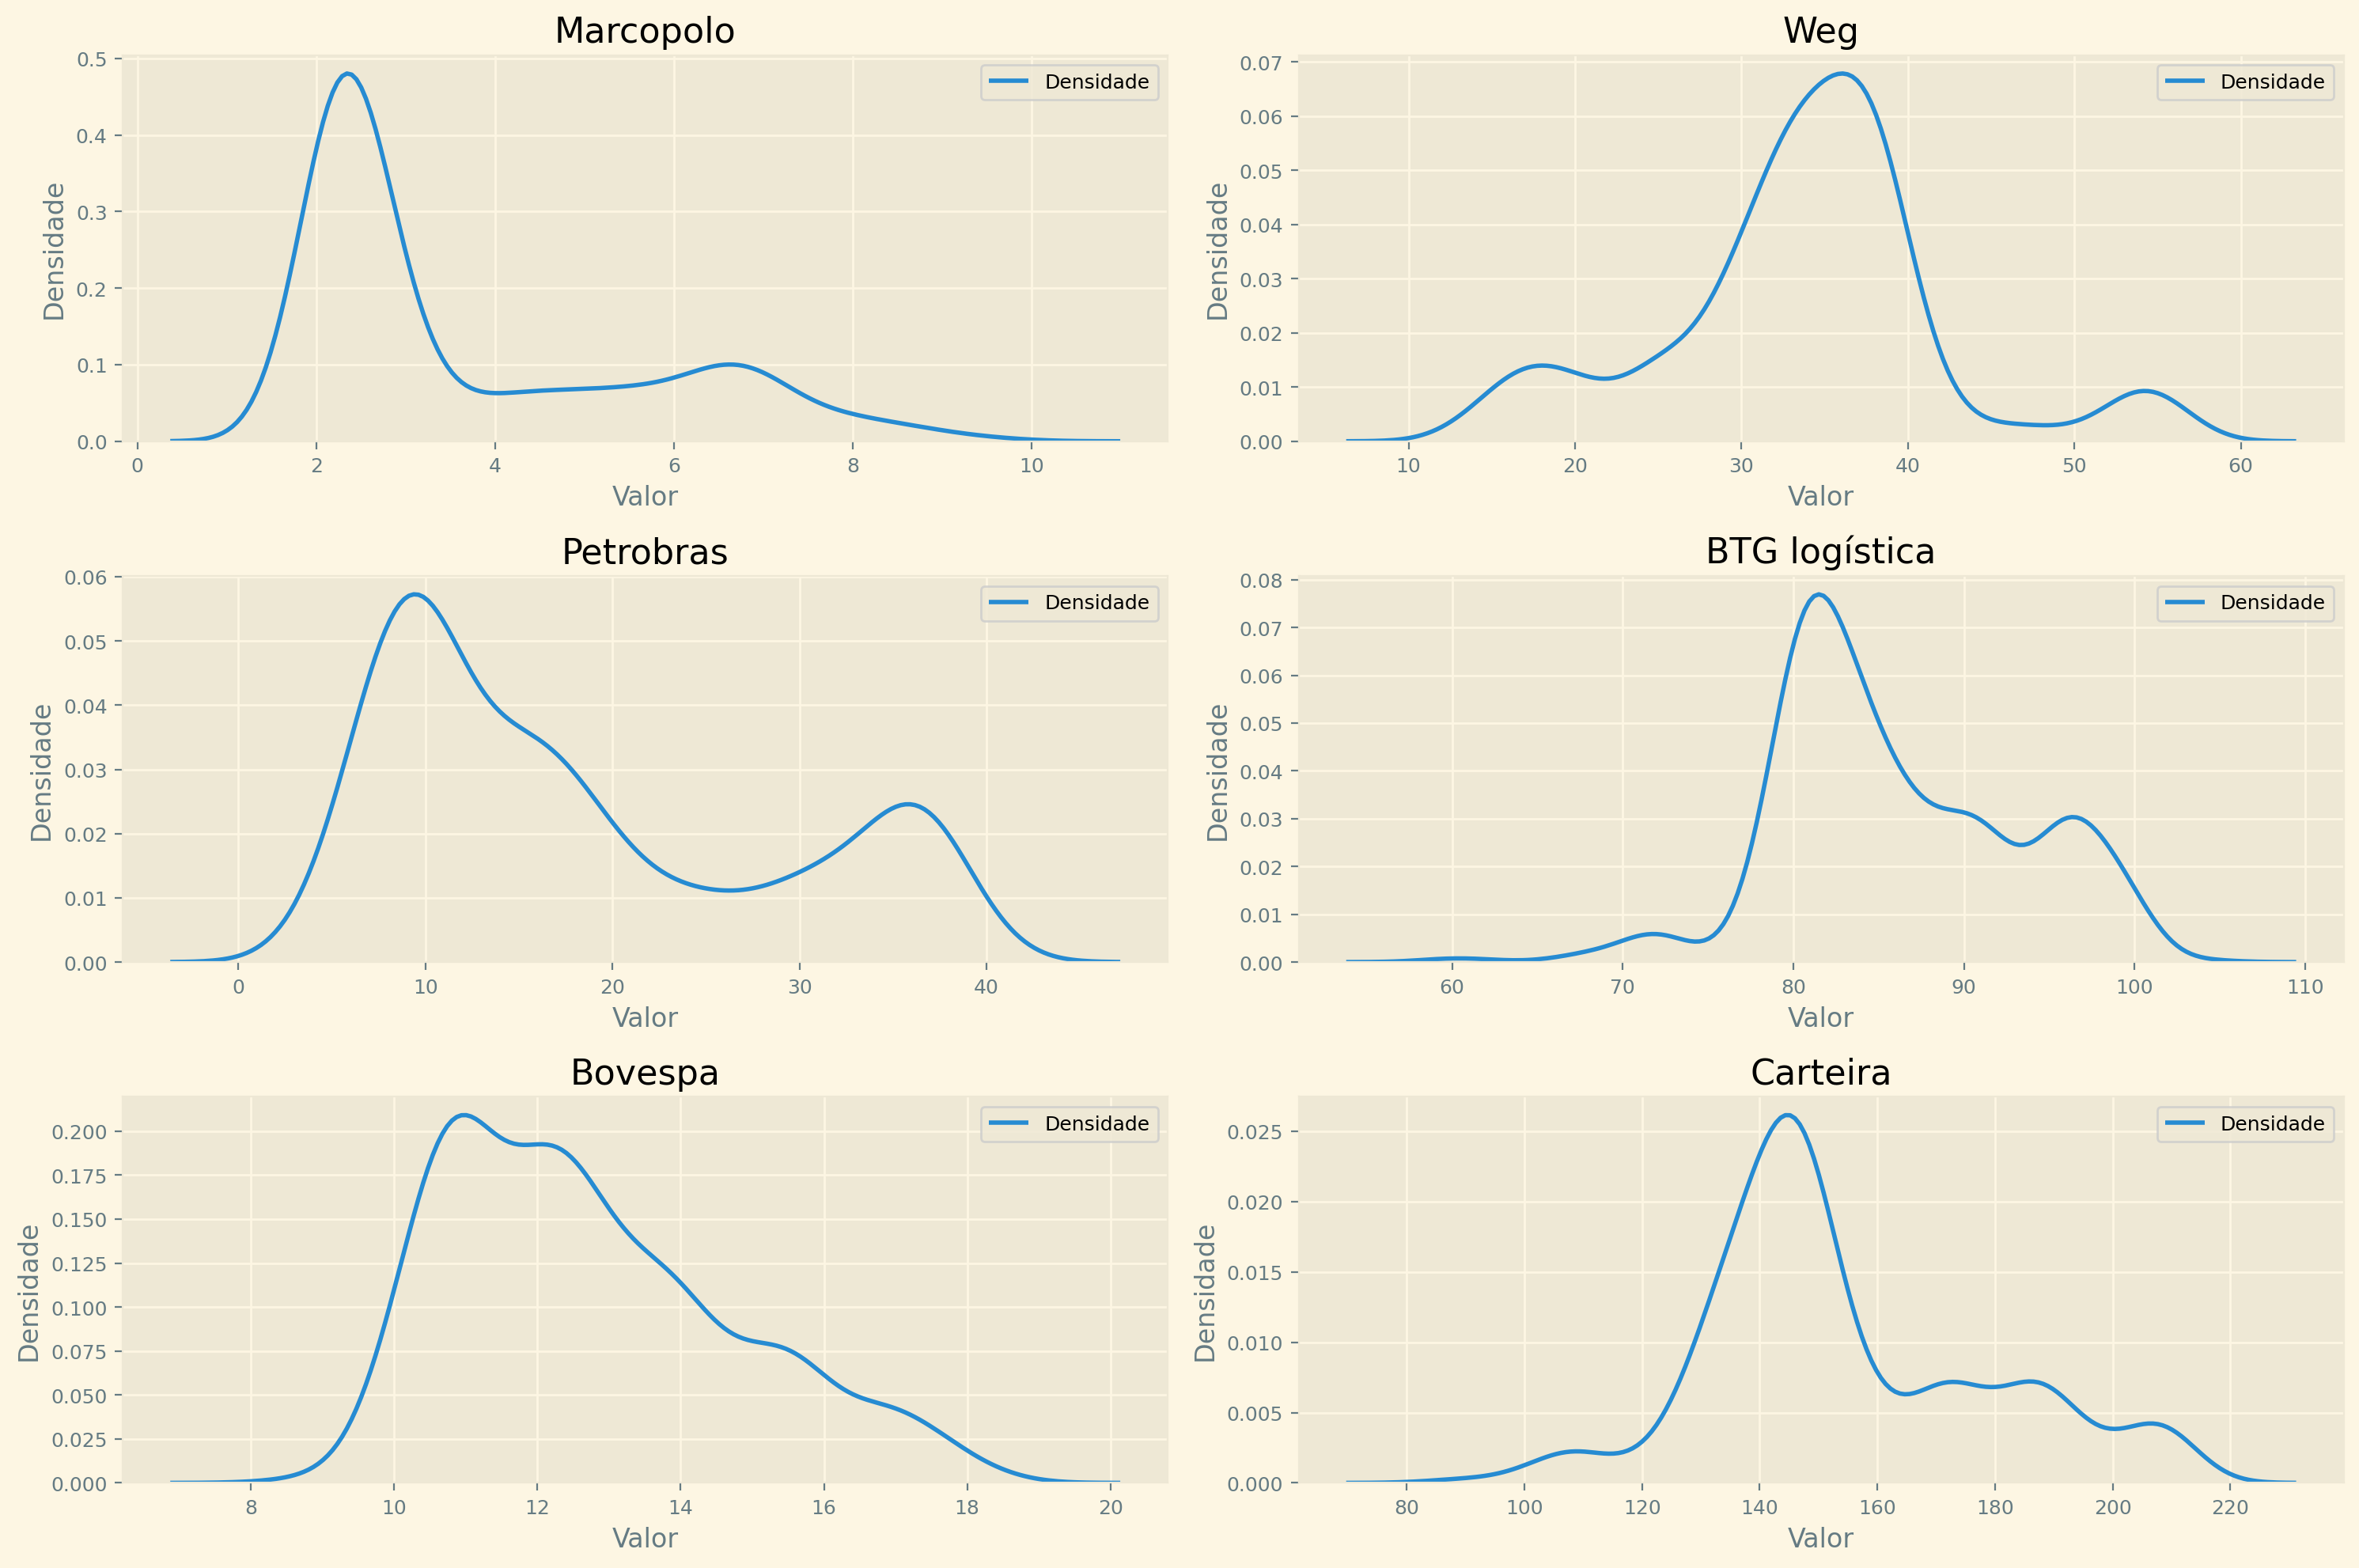

In [15]:
def plot_density(df_adj_close, company_names, figsize=(15, 10)):
    """
    Function to calculate and plot the density of Adjusted Close prices.

    Parameters:
    - df_adj_close (pd.DataFrame): DataFrame containing 'Date' as the first column and other columns as prices of different companies.
    - company_names (list): List of company names to plot.
    - figsize (tuple): Size of the figure (width, height).
    """
    company_data = df_adj_close.copy()
    company_data['Carteira'] = company_data.iloc[:, :].sum(axis=1)
    
    # Configurar subplots dinamicamente
    num_companies = len(company_names) + 1
    num_rows = (num_companies + 1) // 2
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=figsize)
    axes = axes.flatten()  # Flatten para fácil iteração

    # Plotar densidade para cada empresa
    companys = company_names.copy()
    companys.append('Carteira')
    for i, company in enumerate(companys):
        ax = axes[i]  # Determinar posição do subplot
        sns.kdeplot(company_data[company], ax=ax, label='Densidade')
        
        # Customizar o gráfico
        ax.set_title(company)
        ax.set_ylabel('Densidade')
        ax.set_xlabel('Valor')
        ax.legend()
        ax.grid(True)

    # Ajustar layout para evitar sobreposição
    fig.tight_layout()

    # Mostrar o gráfico
    plt.show()

# Example usage:
plot_density(df_adj_close, company_names)
